# 모델링 사용 설명서 1탄 - Linear Regression

## 1. 사이킷런 LinearRegression

### 1) LinearRegression
- 사이킷런의 linear_models 모듈이 제공하는 다양한 종류의 선형 기반 회귀 클래스 중 규제가 적용되지 않은 선형 회귀를 구현한 클래스


- 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화하여 OLS(Ordinary Least Squares) 방식으로 추정

#### [ 입력 파라미터 ]
- fit_intercept: intercept(절편) 값을 계산할 것인지 계산하지 않을 것인지 즉, 상수항이 있는지 없는지를 지정. 디폴트는 True, False로 지정할 경우 절편은 0으로 지정


- normalize: True로 지정하면 회귀를 수행하기 전에 입력 데이터 세트를 정규화

#### [ 속성 ]
- coef_(Target 값 개수, 피처 개수): fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성


- intercept_: intercept 값이 저장되어 있는 속성

### 2) 회귀 평가 지표
- 오류의 절대값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 회귀 평가 지표로 사용함

#### [ 회귀 ]
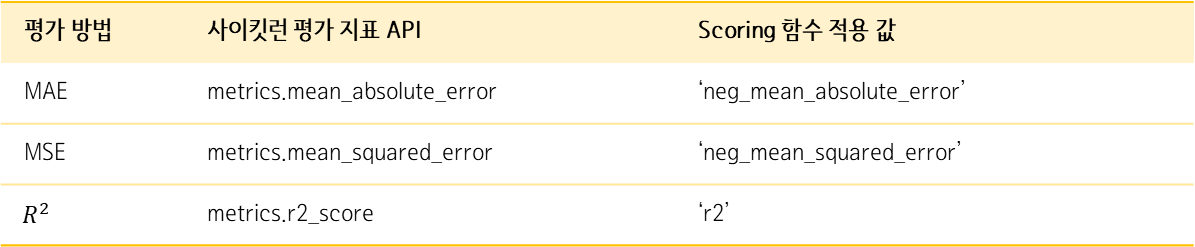

### 3) 영화 관객수 예측하기 실습

#### [  데이터 불러오기 ]

In [15]:
import numpy as np
import pandas as pd
train = pd.read_csv('./data/train.csv')

#### [ 데이터 살펴보기 ]

In [16]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [17]:
train.dtypes

title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
dtype: object

- title: 영화 제목
- distributor: 배급사
- genre: 장르
- release_time: 개봉일
- time: 상영시간(분)
- screening_rat: 상영등급
- director: 감독이름
- dir_prev_bfnum: 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 평균 관객수
- dir_prev_num: 해당 감독이 영화를 만들기 전 제작에 참여한 영화의 개수
- num_staff: 스텝수
- num_actor: 주연배우수
- box_off_num: 관객수

#### [ 결측치 확인 ]

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [19]:
train[train.isna().sum(axis=1) > 0].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [20]:
# 수치형 데이터에서 결측치에 0값 넣기
train_preprocessed = train.fillna(0)
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


#### [ 레이블 인코딩 ]

In [21]:
# 레이블 인코딩을 하기 위한 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            label_map = {'unknown':0}
            for i, key in enumerate(train[col].unique()):
                label_map[key] = i + 1
            label_maps[col] = label_map
    return label_maps

In [22]:
# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])
    return dataframe

In [23]:
# 전처리 완료한 train 데이터: train_preprocessed
label_map = make_label_map(train_preprocessed)
labeled_train = label_encoder(train_preprocessed, label_map)

#### [ 모델링 ]

In [24]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

target = labeled_train['box_off_num']
print(target.shape)

# 학습에 불필요한 변수 제거
feature = labeled_train.drop(['title', 'director', 'dir_prev_bfnum', 'box_off_num'], axis=1)
print(feature.shape)

(600,)
(600, 8)


In [27]:
lr = LinearRegression()

# 폴드 개수 할당
kfold = KFold(n_splits=5)

In [28]:
cv_rmse = []
n_iter = 0

for train_index, test_index in kfold.split(feature):
    x_train, x_test = feature.iloc[train_index], feature.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # 모델 학습
    lr = lr.fit(x_train, y_train)
    
    # 테스트셋 예측
    pred = lr.predict(x_test)
    
    # 반복 횟수 1회 증가
    n_iter += 1
    
    error = RMSE(y_test, pred)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n{0}번째 교차 검증 RMSE : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, error, train_size, test_size))
    print('{0}번째 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_rmse.append(error)

print('\n ==> 이 방정식의 평균 RMSE는 {}입니다.'.format(np.mean(cv_rmse)))


1번째 교차 검증 RMSE : 1314340.7825448373, 학습 데이터 크기 : 480, 검증 데이터 크기 : 120
1번째 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

2번째 교차 검증 RMSE : 1180114.1933342586, 학습 데이터 크기 : 480, 검증 데이터 크기 : 120
2번째 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 2

In [29]:
# cross_val_score()로 구현하기
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, feature, target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores))
print('5 folds 의 평균 RMSE:', np.round(avg_rmse), 3)

5 folds 의 개별 Negative MSE scores: [-1.72749169e+12 -1.39266951e+12 -1.41767084e+12 -3.59484510e+12
 -3.45111079e+12]
5 folds 의 개별 RMSE scores: [1314341. 1180114. 1190660. 1896008. 1857717.]
5 folds 의 평균 RMSE: 1487768.0 3


#### [ 예측하기 ]

In [30]:
# 데이터 불러오기
test = pd.read_csv('./data/test.csv')
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [33]:
test_preprocessed = test.fillna(0)
test_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  243 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [35]:
labeled_test = label_encoder(test_preprocessed, label_map)
labeled_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,0.0,25.0,2,0.0,125,1,0.0,3.005290e+05,2,304,3
1,0.0,2.0,7,43.0,113,4,0.0,3.427002e+05,4,275,3
2,0.0,18.0,6,297.0,115,4,0.0,4.206611e+06,3,419,7
3,0.0,2.0,1,73.0,116,2,125.0,6.913420e+05,2,408,2
4,0.0,18.0,8,25.0,110,2,0.0,3.173800e+04,1,380,1


In [37]:
labeled_test = labeled_test.drop(['title', 'director', 'dir_prev_bfnum'], axis=1)
labeled_test.head()

,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor
0,25.0,2,0.0,125,1,2,304,3
1,2.0,7,43.0,113,4,4,275,3
2,18.0,6,297.0,115,4,3,419,7
3,2.0,1,73.0,116,2,2,408,2
4,18.0,8,25.0,110,2,1,380,1


In [38]:
labeled_test.shape

(243, 8)

In [39]:
predict_test = lr.predict(labeled_test)
predict_test

array([ 1.67721519e+06,  1.56681035e+06,  2.73019576e+06,  2.36792919e+06,
        1.58334597e+06,  8.88696234e+05, -1.28493619e+05,  4.87470489e+05,
        2.20694932e+05,  1.37230837e+06,  7.36892011e+05,  1.49773388e+06,
        2.14956690e+06,  3.49146792e+05,  1.63929015e+06,  3.10181610e+06,
        7.56002593e+05,  2.13026800e+06,  1.26518095e+06,  2.20595459e+05,
        2.82548507e+05,  6.38545110e+04,  2.39073160e+05, -6.87620549e+05,
        2.87409062e+03,  2.31337754e+06, -3.48770698e+04,  1.68825178e+06,
        3.59985738e+05,  9.49248337e+05,  1.48277608e+06, -3.88603489e+05,
        2.78199357e+05,  2.08048405e+06,  2.62604207e+05, -7.56051446e+04,
       -1.19843015e+05, -5.35421168e+04,  1.60661914e+05, -2.53815540e+05,
        8.94981225e+05,  1.59582164e+05,  8.48416849e+05,  8.30137970e+04,
        1.00004891e+06,  2.27898361e+06,  2.45574273e+05,  7.58154263e+05,
        4.09663025e+05, -4.99290039e+05,  1.01167066e+05,  1.09028877e+06,
        3.46581294e+05,  

## 2. 규제 선형 모델

### 1) 릿지 회귀 (Ridge)
- W의 제곱에 대해 페널티를 부여하는 L2 규제를 선형 회귀에 적용한 것이 릿지(Ridge) 회귀


- Ridge 클래스의 주요 생성 파라미터 alpha는 릿지 회귀의 alpha L2 규제 계수에 해당


- alpha 값을 증가시키면 회귀 계수가 0에 가까워짐

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, feature, target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [42]:
print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-1.72624586e+12 -1.39114422e+12 -1.41726581e+12 -3.59520524e+12
 -3.45087051e+12]
5 folds 의 개별 RMSE scores: [1313866.76  1179467.769 1190489.734 1896102.645 1857651.881]
5 folds 의 평균 RMSE: 1487515.758


In [43]:
# alpha 값의 변화에 따른 평균 RMSE의 변화
ridge_alphas = [0, 0.1, 1, 10, 100]
print('###### Ridge ######\n')

for alpha in ridge_alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, feature, target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))

###### Ridge ######

alpha 0 일 때 5 folds 의 평균 RMSE:1487767.807
alpha 0.1 일 때 5 folds 의 평균 RMSE:1487765.226
alpha 1 일 때 5 folds 의 평균 RMSE:1487742.049
alpha 10 일 때 5 folds 의 평균 RMSE:1487515.758
alpha 100 일 때 5 folds 의 평균 RMSE:1485695.767


In [44]:
# alpha 값의 변화에 따른 회귀 계수의 변화
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(ridge_alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(feature, target)
    
    coeff = pd.Series(data=ridge.coef_, index=feature.columns)
    colname = 'alpha' + str(alpha)
    coeff_df[colname] = coeff
    
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha0,alpha0.1,alpha1,alpha10,alpha100
screening_rat,93379.069427,93365.615596,93244.708154,92052.905834,81641.056072
num_actor,44383.823622,44382.705822,44372.646378,44272.129471,43277.146636
time,15841.252900,15841.210485,15840.829463,15837.088757,15805.657837
dir_prev_num,5931.760724,5930.924963,5923.412758,5849.234583,5191.521696
num_staff,4301.801583,4301.810959,4301.895259,4302.730050,4310.350680
release_time,1924.576109,1924.568222,1924.497314,1923.795632,1917.429324
distributor,-4419.174633,-4419.155411,-4418.982662,-4417.278875,-4402.308465
genre,-37319.235598,-37318.531850,-37312.194242,-37248.444105,-36581.715537


### 2) 라쏘 회귀 (Lasso)
- W의 절대값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀


- Lasso 클래스의 주요 생성 파라미터 alpha는 라쏘 회귀의 alpha L1 규제 계수에 해당

In [45]:
# alpha 값의 변화에 따른 평균 RMSE의 변화
from sklearn.linear_model import Lasso

print('###### Lasso ######\n')
lasso_alphas = [0.07, 0.1, 0.5, 1.3]

for alpha in lasso_alphas:
    lasso = Lasso(alpha = alpha)
    
    neg_mse_scores = cross_val_score(lasso, feature, target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))

###### Lasso ######

alpha 0.07 일 때 5 folds 의 평균 RMSE:1487767.798
alpha 0.1 일 때 5 folds 의 평균 RMSE:1487767.794
alpha 0.5 일 때 5 folds 의 평균 RMSE:1487767.740
alpha 1.3 일 때 5 folds 의 평균 RMSE:1487767.633


In [46]:
# alpha 값의 변화에 따른 회귀 계수의 변화
coeff_df = pd.DataFrame()
lasso_alphas = [0.07, 0.1, 0.5, 1.3]

for pos, alpha in enumerate(lasso_alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(feature, target)
    
    coeff = pd.Series(data=lasso.coef_, index=feature.columns)
    colname = 'alpha' + str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha' + str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1.3
screening_rat,93379.010848,93378.985739,93378.650966,93377.981410
num_actor,44383.811559,44383.806391,44383.737480,44383.599669
time,15841.252771,15841.252716,15841.251967,15841.250424
dir_prev_num,5931.697407,5931.670335,5931.308881,5930.585277
num_staff,4301.801827,4301.801932,4301.803330,4301.806130
release_time,1924.576079,1924.576066,1924.575895,1924.575552
distributor,-4419.174629,-4419.174625,-4419.174589,-4419.174527
genre,-37319.224603,-37319.219883,-37319.157003,-37319.031309


### 3) 엘라스틱넷 회귀 (Elastic Net)
- L2 규제와 L1 규제를 결합한 회귀

In [47]:
# alpha 값의 변화에 따른 평균 RMSE의 변화
from sklearn.linear_model import ElasticNet

elastic_alphas = [0.07, 0.1, 0.5, 1.3]

for alpha in elastic_alphas:
    elastic = ElasticNet(alpha = alpha, l1_ratio=0.7)
    
    neg_mse_scores = cross_val_score(elastic, feature, target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE:1487513.783
alpha 0.1 일 때 5 folds 의 평균 RMSE:1487408.625
alpha 0.5 일 때 5 folds 의 평균 RMSE:1486188.116
alpha 1.3 일 때 5 folds 의 평균 RMSE:1484463.845


In [49]:
# alpha 값의 변화에 따른 회귀 계수의 변화
coeff_df = pd.DataFrame()
elastic_alphas = [0.07, 0.1, 0.5, 1.3]

for pos, alpha in enumerate(elastic_alphas):
    elastic = ElasticNet(alpha = alpha, l1_ratio=0.7)
    elastic.fit(feature, target)
    
    coeff = pd.Series(data=elastic.coef_, index=feature.columns)
    colname = 'alpha' + str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha' + str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1.3
screening_rat,91714.308221,91019.157063,82678.051088,69920.079495
num_actor,44243.110291,44182.895155,43386.562388,41842.619084
time,15836.031081,15833.866669,15808.681598,15773.335155
dir_prev_num,5828.076472,5784.646602,5257.520468,4431.361157
num_staff,4302.968645,4303.460076,4309.563650,4319.810161
release_time,1923.595364,1923.182899,1918.084414,1909.620833
distributor,-4416.794549,-4415.799656,-4403.807583,-4385.213337
genre,-37229.897044,-37191.220648,-36657.795816,-35536.713345
